Copyright ©2021-2022. Stephen Rigden.
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

In [1]:
import random

import pandas
import seaborn

from heart_health.utilities import TimeCategories

# style must be one of 'white', 'dark', 'whitegrid', 'darkgrid'. 'ticks'
seaborn.set_theme(style="darkgrid", color_codes=True)

# Demo of .apply used to add a new column to a dataset

In [2]:
df = pandas.DataFrame({'date': pandas.date_range('20211101', periods=10)})
df

,date
0,2021-11-01
1,2021-11-02
2,2021-11-03
3,2021-11-04
4,2021-11-05
5,2021-11-06
6,2021-11-07
7,2021-11-08
8,2021-11-09
9,2021-11-10


In [3]:
def myfunc(*args):
    return '42 ' + str(random.randint(421, 423))

myfunc()

'42 421'

In [4]:
df2 = df.loc[:, ['date']]
df2['my_new_col'] = df2['date'].apply(myfunc)
df2

,date,my_new_col
0,2021-11-01,42 421
1,2021-11-02,42 421
2,2021-11-03,42 421
3,2021-11-04,42 423
4,2021-11-05,42 421
5,2021-11-06,42 422
6,2021-11-07,42 423
7,2021-11-08,42 422
8,2021-11-09,42 421
9,2021-11-10,42 421


# Demo with TimeCategories

In [5]:
df3 = pandas.DataFrame({'date': pandas.date_range('20211122', periods=17)})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 264.0 bytes


In [6]:
df3

,date
0,2021-11-22
1,2021-11-23
2,2021-11-24
3,2021-11-25
4,2021-11-26
5,2021-11-27
6,2021-11-28
7,2021-11-29
8,2021-11-30
9,2021-12-01


In [7]:
start = pandas.Timestamp(2021, 11, 26)
end = pandas.Timestamp(2021, 12, 5)
bucket_size = 3
time_categories = TimeCategories(start, end, bucket_size)
time_categories

TimeCategories(start_date=Timestamp('2021-11-27 00:00:00'), end_date=Timestamp('2021-12-05 00:00:00'), bucket_size=3)

In [8]:
df3['bucket'] = df3['date'].apply(time_categories.get_bucket)
df3

,date,bucket
0,2021-11-22,None
1,2021-11-23,None
2,2021-11-24,None
3,2021-11-25,None
4,2021-11-26,None
5,2021-11-27,2021-11-29
6,2021-11-28,2021-11-29
7,2021-11-29,2021-11-29
8,2021-11-30,2021-12-02
9,2021-12-01,2021-12-02


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17 non-null     datetime64[ns]
 1   bucket  9 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 400.0+ bytes


# Demo category plot

In [10]:
df4 = df3.copy(deep=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17 non-null     datetime64[ns]
 1   bucket  9 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 400.0+ bytes


In [11]:
df4.head(7)

,date,bucket
0,2021-11-22,None
1,2021-11-23,None
2,2021-11-24,None
3,2021-11-25,None
4,2021-11-26,None
5,2021-11-27,2021-11-29
6,2021-11-28,2021-11-29


In [12]:
df4['rand'] = df4.date.apply(lambda x: random.randint(1, 9))
df4.head(7)

,date,bucket,rand
0,2021-11-22,None,8
1,2021-11-23,None,8
2,2021-11-24,None,3
3,2021-11-25,None,1
4,2021-11-26,None,4
5,2021-11-27,2021-11-29,3
6,2021-11-28,2021-11-29,4


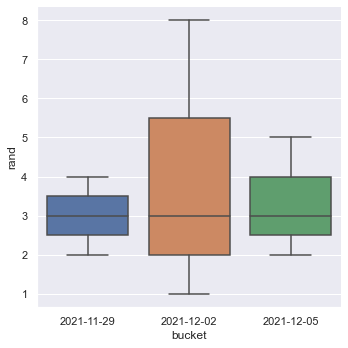

In [13]:
seaborn.catplot(data=df4, kind='box', x='bucket', y='rand')

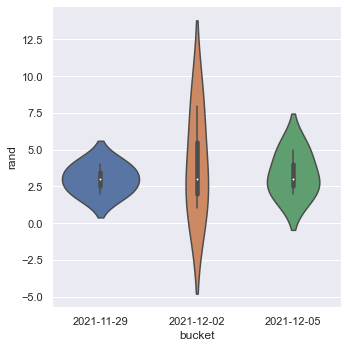

In [14]:
seaborn.catplot(data=df4, kind='violin', x='bucket', y='rand')